                                                            VERİ SETİNİ YÜKLEME VE İNCELEME
Bu kod, Kaggle’dan alınan kedi-köpek veri setinin genel özelliklerini görmek amacıyla yazılmıştır. Öncelikle eğitim ve test setlerinin boyutları hesaplanmış, toplam örnek sayıları ve sınıf sayısı ekrana yazdırılmıştır. Daha sonra eğitim setinden rastgele seçilen 20 görüntü görselleştirilerek veri setinin içeriği gözlemlenmiştir. 

Eğitim verisi şekli: (25000, 224, 224, 3)
Test verisi şekli: (1, 224, 224, 3)
Sınıf sayısı: 2


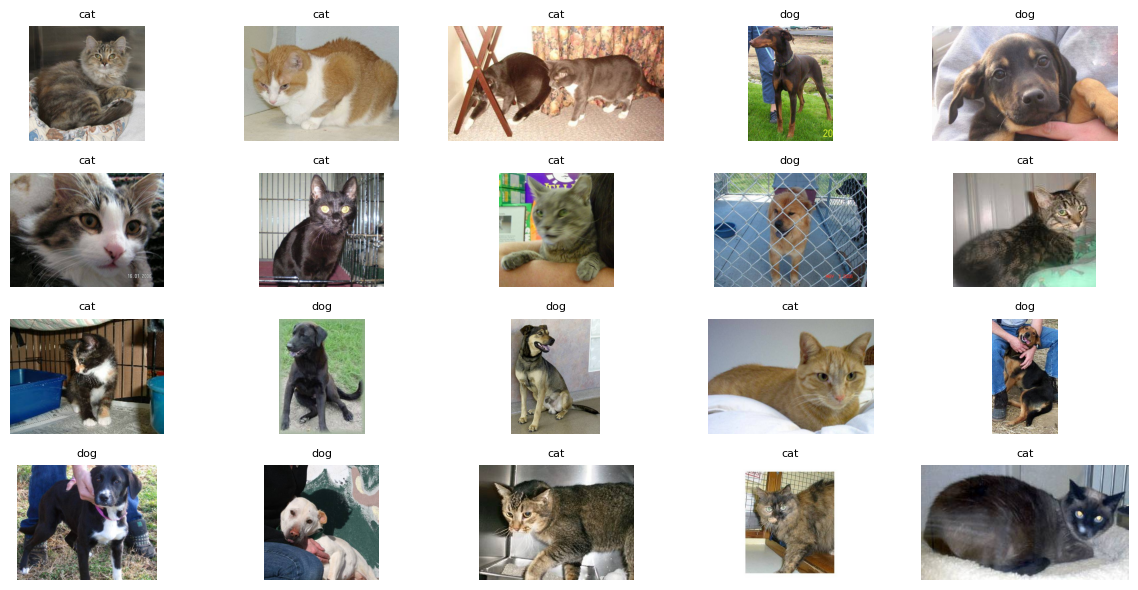

In [22]:
import os
import random
import matplotlib.pyplot as plt
import pandas as pd
import cv2


train_path = "/kaggle/input/dog-cat222/dogs-vs-cats2/train"
test_path = "/kaggle/input/dog-cat222/dogs-vs-cats2/test1" 


classes = os.listdir(train_path)


train_counts = {cls: len(os.listdir(os.path.join(train_path, cls))) for cls in classes}


test_total = len(os.listdir(test_path))


print("Eğitim verisi şekli:", (sum(train_counts.values()), 224, 224, 3))
print("Test verisi şekli:", (test_total, 224, 224, 3))
print("Sınıf sayısı:", len(classes))


plt.figure(figsize=(12,6))
for i in range(20):
    cls = random.choice(classes)
    img_name = random.choice(os.listdir(os.path.join(train_path, cls)))
    img_path = os.path.join(train_path, cls, img_name)
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    plt.subplot(4,5,i+1)
    plt.imshow(img)
    plt.title(cls, fontsize=8)
    plt.axis("off")
plt.tight_layout()
plt.show()

df_counts = pd.DataFrame({
    "Sınıf": classes,
    "Eğitim Veri Sayısı": [train_counts[c] for c in classes],
})




****

                                                            OPTİMİZER ALGORİTMALARI
Bu kod, farklı optimizasyon algoritmalarının (SGD, Momentum, Adam, RMSprop) aynı veri seti üzerinde performanslarını karşılaştırmak için yazılmıştır.

-ImageDataGenerator kullanılarak eğitim verisi %80 eğitim, %20 doğrulama olacak şekilde hazırlanmıştır.

-Basit bir yapay sinir ağı modeli (Flatten + Dense katmanları) tanımlanmıştır.

-Aynı model, her seferinde farklı bir optimizer ile (SGD, Momentumlu SGD, Adam, RMSprop) eğitilmiştir.

-Her optimizer için doğrulama doğruluk değerleri kayıt altına alınmıştır.

-Son aşamada doğruluk değerleri grafik üzerinde çizdirilerek karşılaştırılmıştır.



Eğitim başlıyor: SGD
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.

Eğitim başlıyor: Momentum
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.

Eğitim başlıyor: Adam
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.

Eğitim başlıyor: RMSprop
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


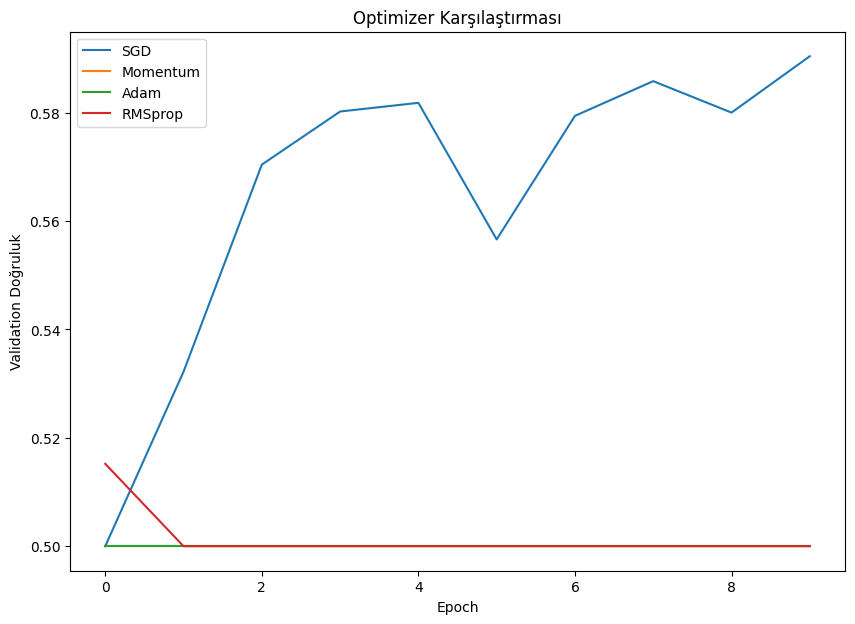

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_path = "/kaggle/input/dog-cat222/dogs-vs-cats2/train"  

optimizers = {
    "SGD": keras.optimizers.SGD(),
    "Momentum": keras.optimizers.SGD(momentum=0.9),
    "Adam": keras.optimizers.Adam(),
    "RMSprop": keras.optimizers.RMSprop()
}

histories = {}

for opt_name, optimizer in optimizers.items():
    print(f"\nEğitim başlıyor: {opt_name}")

   
    train_data = train_datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        batch_size=16,
        class_mode='binary',
        subset='training'
    )

    
    val_data = train_datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        batch_size=16,
        class_mode='binary',
        subset='validation'
    )

    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(224,224,3)),  
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')     
    ])

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        train_data,
        epochs=10, 
        validation_data=val_data,
        verbose=0
    )

    histories[opt_name] = history.history['val_accuracy']

plt.figure(figsize=(10,7))
for opt_name, acc in histories.items():
    plt.plot(acc, label=opt_name)

plt.title("Optimizer Karşılaştırması")
plt.xlabel("Epoch")
plt.ylabel("Validation Doğruluk")
plt.legend()
plt.show()


-En iyi sonucu veren optimizer algoritmasının SGD olduğuna karar verilmiştir.

                                                    KAYIP FONKSİYONLARI KARŞILAŞTIRMASI
Bu kod, farklı kayıp fonksiyonlarının (binary_crossentropy, mean_squared_error, hinge, squared_hinge) aynı veri seti üzerinde performanslarını karşılaştırmak için yazılmıştır.

-ImageDataGenerator kullanılarak eğitim verisi %80 eğitim, %20 doğrulama olacak şekilde hazırlanmıştır.

-Basit bir yapay sinir ağı modeli (Flatten + Dense katmanları) tanımlanmıştır.

-Aynı model, her seferinde farklı bir kayıp fonksiyonu ile eğitilmiştir.

-Her kayıp fonksiyonu için eğitim ve doğrulama kayıp değerleri kayıt altına alınmıştır.

-Son aşamada kayıp değerleri grafik üzerinde çizdirilerek karşılaştırılmıştır.



Eğitim başlıyor: binary_crossentropy
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.

Eğitim başlıyor: mean_squared_error
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.

Eğitim başlıyor: hinge
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.

Eğitim başlıyor: squared_hinge
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


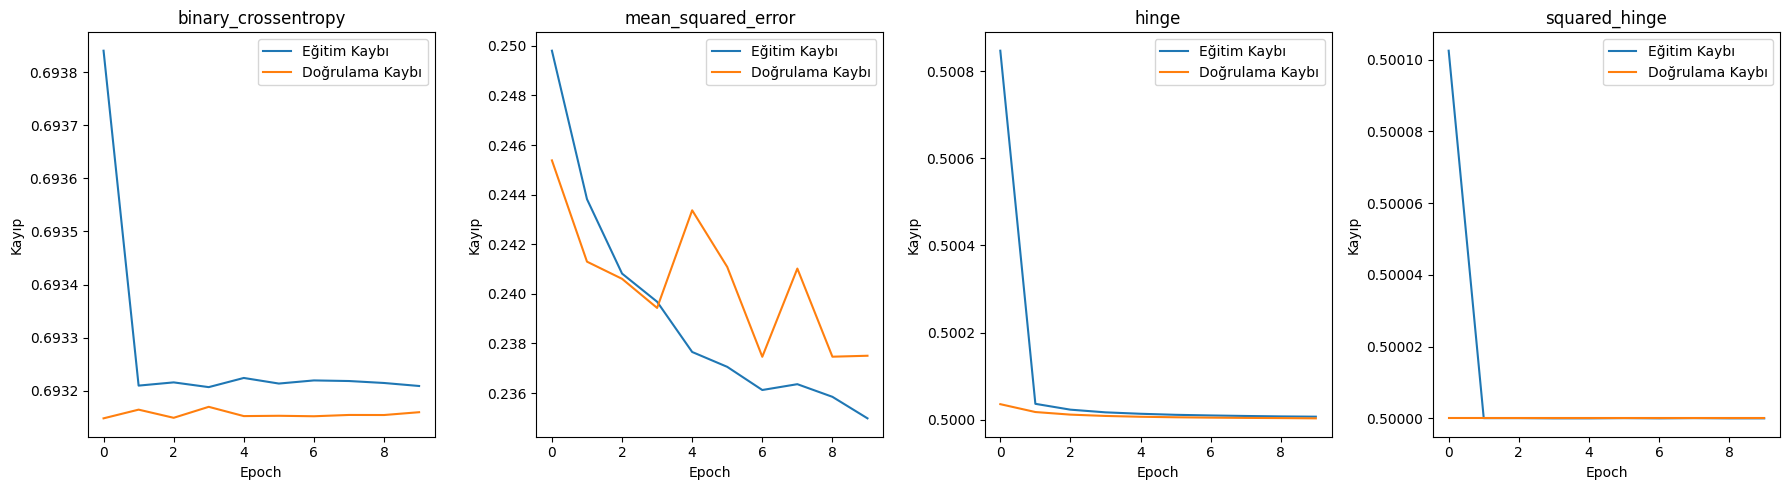

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_path = "/kaggle/input/dog-cat222/dogs-vs-cats2/train"  

loss_functions = [
    "binary_crossentropy",
    "mean_squared_error",
    "hinge",
    "squared_hinge"
]

histories = {}

for loss_name in loss_functions:
    print(f"\nEğitim başlıyor: {loss_name}")

    train_data = train_datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        batch_size=16,
        class_mode='binary',
        subset='training'
    )

    val_data = train_datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        batch_size=16,
        class_mode='binary',
        subset='validation'
    )

    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(224,224,3)), 
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')   
    ])

    model.compile(
        optimizer=keras.optimizers.SGD(), 
        loss=loss_name,
        metrics=['accuracy']
    )

    history = model.fit(
        train_data,
        epochs=10,  
        validation_data=val_data,
        verbose=0
    )

    histories[loss_name] = history

fig, axes = plt.subplots(1, len(loss_functions), figsize=(18,5))

for i, loss_name in enumerate(loss_functions):
    history = histories[loss_name]
    axes[i].plot(history.history['loss'], label="Eğitim Kaybı")
    axes[i].plot(history.history['val_loss'], label="Doğrulama Kaybı")
    axes[i].set_title(loss_name)
    axes[i].set_xlabel("Epoch")
    axes[i].set_ylabel("Kayıp")
    axes[i].legend()

plt.tight_layout()
plt.show()


En iyi sonucu veren kayıp fonksiyonu algoritmasının MSE(mean_squared_error) olduğuna karar verilmiştir.

                                                      HİPERPARAMETRELER
**Amaç:**
Bu kod, aynı model üzerinde farklı öğrenme oranları (learning rate) ve batch size değerlerinin performansını karşılaştırmak için yazılmıştır. Yani bir nevi hiperparametre optimizasyonu örneğidir.  

**Yöntem**

**1-Veri hazırlığı:**

-ImageDataGenerator ile eğitim verisi %80 eğitim, %20 doğrulama olacak şekilde hazırlanmıştır.

-Piksel değerleri 0–255 aralığındayken, modelin ağırlık güncellemeleri büyük değerlerle çalışır ve öğrenme dengesiz olabilir.Bu nedenle resimler    0–1 aralığına normalize edilmiştir.

**2-Model:**

-Basit bir yapay sinir ağı: Flatten → Dense(10, ReLU) → Dense(1, Sigmoid).(Katman yapısı düşük tutularak burada asıl amaçlanın en iyi hiperparametre kombinasyonunu bulmak olduğu anlaşılmaktadır.)

**3-Hiperparametreler:**

-Learning rate: 0.001, 0.01, 0.1

-Batch size: 8, 16, 32

-Her kombinasyon için model ayrı ayrı eğitiliyor.Burada amaçlanan hangi lr ve batch size kombinasyonun daha iyi sonuç verdiğidir.

**4-Eğitim ve değerlendirme:**

-Kayıp fonksiyonu olarak mean_squared_error kullanılmış.(Daha önceden en iyi sonucu verecek olan kayıp fonksiyonu denenmiştir ve bunun sonucuna bağlı olarak  mean_squared_error kullanılmasına karar verilmiştir.)

-Her kombinasyon için doğrulama doğruluk değeri  kaydediliyor.

**5-Sonuçların kaydı ve yazdırılması:**

-Her kombinasyonun en iyi doğrulama doğruluğu results sözlüğünde saklanıyor.

-Sonuçlar ekrana özetleniyor.

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_path = "/kaggle/input/dog-cat222/dogs-vs-cats2/train"

learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [8, 16, 32]

results = {}

for lr in learning_rates:
    for bs in batch_sizes:

        train_data = train_datagen.flow_from_directory(
            train_path,
            target_size=(224,224),
            batch_size=bs,
            class_mode='binary',
            subset='training',
            shuffle=True
        )

        val_data = train_datagen.flow_from_directory(
            train_path,
            target_size=(224,224),
            batch_size=bs,
            class_mode='binary',
            subset='validation',
            shuffle=False
        )

        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(224,224,3)),
            keras.layers.Dense(10, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid')
        ])

        optimizer = keras.optimizers.SGD(learning_rate=lr)

        model.compile(
            optimizer=optimizer,
            loss="mean_squared_error",
            metrics=['accuracy']
        )

        history = model.fit(
            train_data,
            epochs=10,
            validation_data=val_data,
            verbose=0
        )

        best_val_acc = max(history.history['val_accuracy'])
        results[f"lr_{lr}_bs_{bs}"] = best_val_acc

       
        print(f"lr={lr}, batch_size={bs} -> doğruluk: {best_val_acc:.4f}")


print("\nHiperparametre sonuçları:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
lr=0.001, batch_size=8 -> doğruluk: 0.6152
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
lr=0.001, batch_size=16 -> doğruluk: 0.6264
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
lr=0.001, batch_size=32 -> doğruluk: 0.6254
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
lr=0.01, batch_size=8 -> doğruluk: 0.5000
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
lr=0.01, batch_size=16 -> doğruluk: 0.5000
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
lr=0.01, batch_size=32 -> doğruluk: 0.5000
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
lr=0.1, batch_size=8 -> doğruluk: 0.5000
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
lr=0.1, batch_size=1

-Sonuçlara bağlı olarak en iyi hipermetre kombinasyonunun learning rate’in(öğrenme oranı) 0.001 ve batch size’ın 16 olduğu durumdur.

                                                         TRANSFER LEARNİNG
**Amaç**

-Bu kod, önceden eğitilmiş bir model olan MobileNetV2 kullanarak kedi ve köpek sınıflandırması yapmak ve transfer learning yönteminin performansını değerlendirmek için yazılmıştır.

**Yöntem ve Adımlar**

**Veri hazırlığı ve artırma (augmentation):**

-ImageDataGenerator ile resimler 0–1 aralığına normalize edilmiş, döndürme, kaydırma, zoom ve yatay çevirme gibi veri artırma işlemleri uygulanmıştır.

-Eğitim verisi %80, doğrulama verisi %20 olacak şekilde ayrılmıştır.

**Transfer Learning Modeli:**

-MobileNetV2 önceden eğitilmiş model olarak kullanılmış, üst katmanlar (feature extractor) dondurulmuştur.

-Yeni üst katmanlar eklenmiştir: GlobalAveragePooling → Dense(128, ReLU) → Dropout(0.4) → Dense(2, Softmax)

**Model eğitimi:**

-Optimizer: SGD (learning_rate=0.001) 
                                                 (Yukarıda en iyi sonuçları verenler bulunmuş ve şu an kullanılmıştır)
-Kayıp fonksiyonu: MSE

-20 epoch boyunca eğitim ve doğrulama yapılmıştır.



GPU sayısı: 1
GPU listesi: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU aktif mi: True
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 289s 224ms/step - accuracy: 0.7963 - loss: 0.1426 - val_accuracy: 0.9608 - val_loss: 0.0373
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 277s 222ms/step - accuracy: 0.9438 - loss: 0.0475 - val_accuracy: 0.9682 - val_loss: 0.0287
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 270s 216ms/step - accuracy: 0.9528 - loss: 0.0389 - val_accuracy: 0.9720 - val_loss: 0.0242
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 271s 217ms/step - accuracy: 0.9595 - loss: 0.0326 - val_accuracy: 0.9716 - val_loss: 0.0237
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 274s 219ms/step - accuracy: 0.9619 - loss: 0.0312 - val_accuracy: 0.9704 - val_loss: 0.0229
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 268s 214ms/step - accuracy: 0.9645 - loss: 0.0286 - val_accuracy: 0.9718 - val_loss: 0.0217
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 271s 217ms/step - accuracy: 0.9641 - loss: 0.0280 - val_accuracy: 0.9736 - val_loss: 0.0208
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 274s 219ms/step - ac

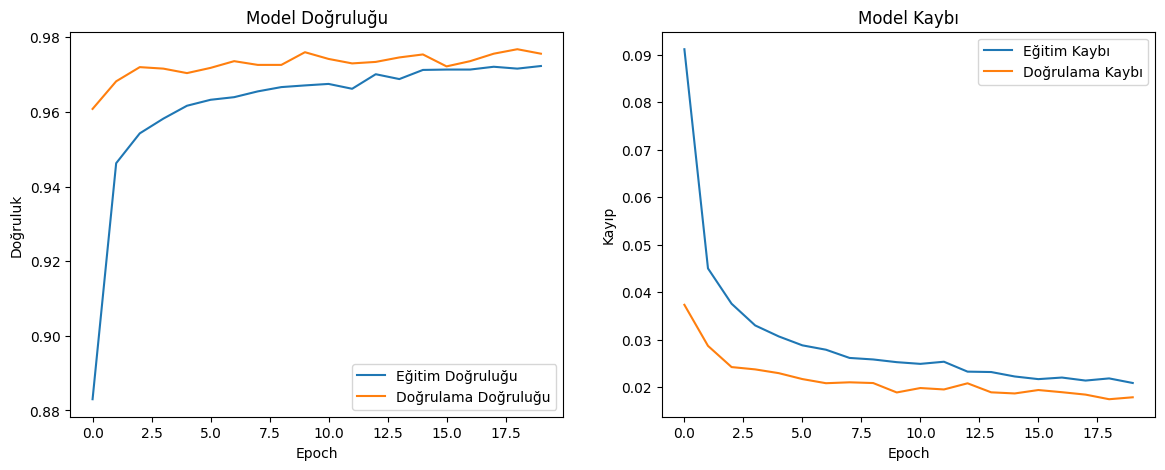

313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 188ms/step


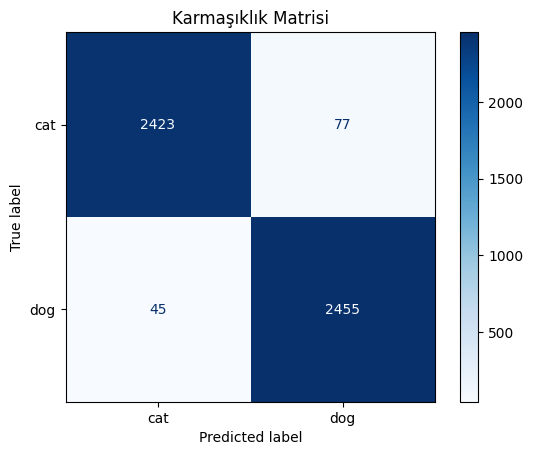

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
import os


print("GPU sayısı:", len(tf.config.list_physical_devices('GPU')))
print("GPU listesi:", tf.config.list_physical_devices('GPU'))
print("GPU aktif mi:", tf.config.list_physical_devices('GPU') != [])
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

train_path = "/kaggle/input/dog-cat222/dogs-vs-cats2/train"


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',  
    subset='training',
    shuffle=True
)


val_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


base_model = keras.applications.MobileNetV2(weights="imagenet",
                                            include_top=False,
                                            input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


transfer_model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(2, activation='softmax')   
])


transfer_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),
                       loss='mse',
                       metrics=['accuracy'])

transfer_model.summary()

history_transfer = transfer_model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    verbose=1
)


def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

   
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Eğitim Doğruluğu')
    plt.plot(epochs, val_acc, label='Doğrulama Doğruluğu')
    plt.title('Model Doğruluğu')
    plt.xlabel('Epoch')
    plt.ylabel('Doğruluk')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Eğitim Kaybı')
    plt.plot(epochs, val_loss, label='Doğrulama Kaybı')
    plt.title('Model Kaybı')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp')
    plt.legend()

    plt.show()

plot_history(history_transfer)


y_true = val_data.classes
y_pred_probs = transfer_model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(val_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Karmaşıklık Matrisi")
plt.show()


**Performans değerlendirme:**

-Eğitim ve doğrulama doğruluğu ve kaybı grafikleri çizilmiştir.

-Doğrulama verisi üzerinde confusion matrix (karmaşıklık matrisi) hesaplanmış ve görselleştirilmiştir.

-Bu grafiklerin ve matrisin amacı modelin doğru sınıflandırma yapma başarısını eğitim ve doğrulama seti üzerinde izlemektir.

**Sonuç:**

-20. epoch sonunda model doğrulama grafiğinde eğitim ve doğrulama doğruluğu 20 epoch boyunca istikrarlı bir şekilde artarak 0.96-0.98 aralığında bir sonuç elde edilmiştir.
-20. epoch sonunda model kaybı grafiğinde eğitim ve doğrulama doğruluğu 20 epoch boyunca istikrarlı bir şekilde azalarak 0.03-0.02 aralığında bir sonuç elde edilmiştir.
-Karmaşıklık matris sonuçlarına bakılarak modelin tahmin sonuçlarında ufak hatalar tespit edilmiştir fakat yine de modelin doğru tahmin oranının yüksek olduğun görülmüştür.

**Mobilenetv2 Kullanım Nedenleri:**

-https://keras.io/api/applications/ Kerasın trasnfer learning modellerinin başarı oranlarına ve toplam parametrelere bakılarak hem eğitimin hızlı olması hem de yüksek doğruluk vermesi amaçlandığından dolayı modelin hızlı eğitilmesi için daha düşük parametreli  ve yüksek doğruluk oranı olan mobilenetv2 kullanılması kararlaştırılmıştır.

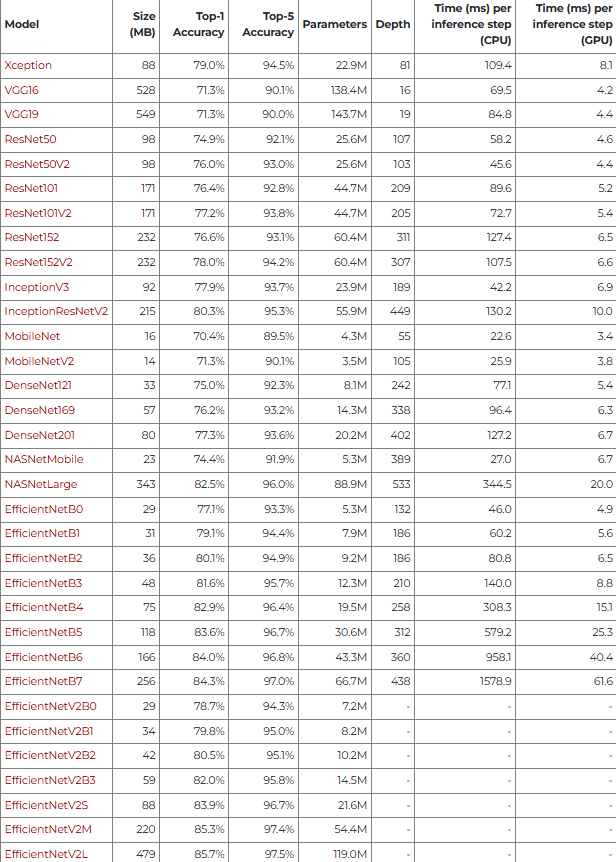

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


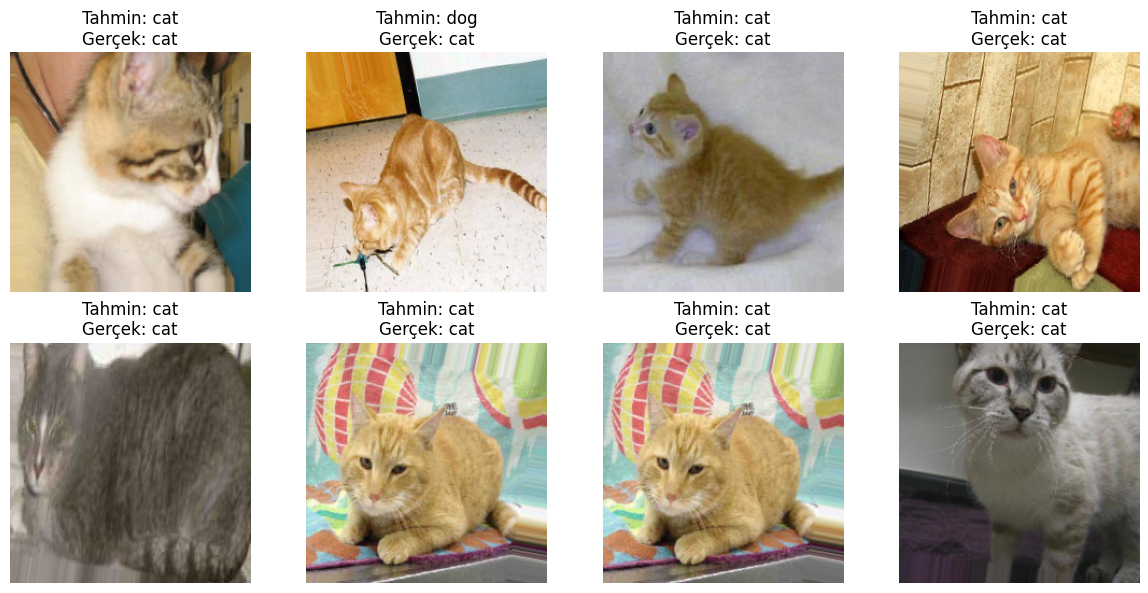

In [16]:
import random


class_names = list(val_data.class_indices.keys())


x_val, y_val = next(iter(val_data)) 
y_pred_probs = transfer_model.predict(x_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

plt.figure(figsize=(12, 6))

for i in range(8):
    idx = random.randint(0, len(x_val)-1)
    
    plt.subplot(2, 4, i+1)
    plt.imshow(x_val[idx])
    plt.axis("off")
    pred_label = class_names[y_pred[idx]]
    true_label = class_names[y_true[idx]]
    plt.title(f"Tahmin: {pred_label}\nGerçek: {true_label}")

plt.tight_layout()
plt.show()


**Amaç**

-Transfer learning ile eğitilmiş modelin doğrulama (validation) verisi üzerindeki tahminlerini görsel olarak incelemek ve modelin sınıflandırma başarısını örneklerle değerlendirmektir.

                                                            EVRİŞİMSEL SİNİR AĞLARI(CNN)
**Amaç**

-Bu kod, kendi tasarladığınız CNN (Convolutional Neural Network) modelini kullanarak kedi ve köpek sınıflandırması yapmak ve modelin performansını eğitim-doğrulama grafikleri ve karmaşıklık matrisi ile değerlendirmek için yazılmıştır.

**İşleyiş ve Adımlar**

-Veri hazırlığı ve artırma (augmentation) yapılmıştır.Burada amaç modelin daha farklı verilerle daha iyi öğrenmesidir.

-ImageDataGenerator ile resimler 0–1 aralığına normalize edilmiş, döndürme, kaydırma, zoom ve yatay çevirme gibi işlemler uygulanmıştır.

-Eğitim verisi %80, doğrulama verisi %20 olacak şekilde ayrılmıştır.

**CNN Modeli:**

-3 adet Convolution + MaxPooling katmanı ile özellikler çıkarılmıştır.

-Flatten → Dense(128, ReLU) → Dropout(0.5) → Dense(2, Softmax) ile sınıflandırma yapılmıştır.

**Model Eğitimi:**

-Optimizer: SGD (learning_rate=0.001)

-Kayıp fonksiyonu: MSE

-20 epoch boyunca eğitim ve doğrulama yapılmıştır.

**Performans görselleştirme:**

-Eğitim ve doğrulama doğruluğu ve kaybı grafikleri çizilmiştir.

-Doğrulama seti üzerinde confusion matrix (karmaşıklık matrisi) hesaplanmış ve görselleştirilmiştir.



GPU sayısı: 1
GPU listesi: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU aktif mi: True
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 274s 217ms/step - accuracy: 0.5244 - loss: 0.2486 - val_accuracy: 0.5744 - val_loss: 0.2442
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 268s 214ms/step - accuracy: 0.5654 - loss: 0.2443 - val_accuracy: 0.6068 - val_loss: 0.2403
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 271s 217ms/step - accuracy: 0.5891 - loss: 0.2405 - val_accuracy: 0.6004 - val_loss: 0.2366
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 271s 217ms/step - accuracy: 0.6000 - loss: 0.2369 - val_accuracy: 0.6270 - val_loss: 0.2320
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 270s 216ms/step - accuracy: 0.6016 - loss: 0.2349 - val_accuracy: 0.6294 - val_loss: 0.2291
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 268s 215ms/step - accuracy: 0.6157 - loss: 0.2310 - val_accuracy: 0.6256 - val_loss: 0.2269
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 272s 217ms/step - accuracy: 0.6173 - loss: 0.2288 - val_accuracy: 0.6368 - val_loss: 0.2244
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 272s 218ms/step - ac

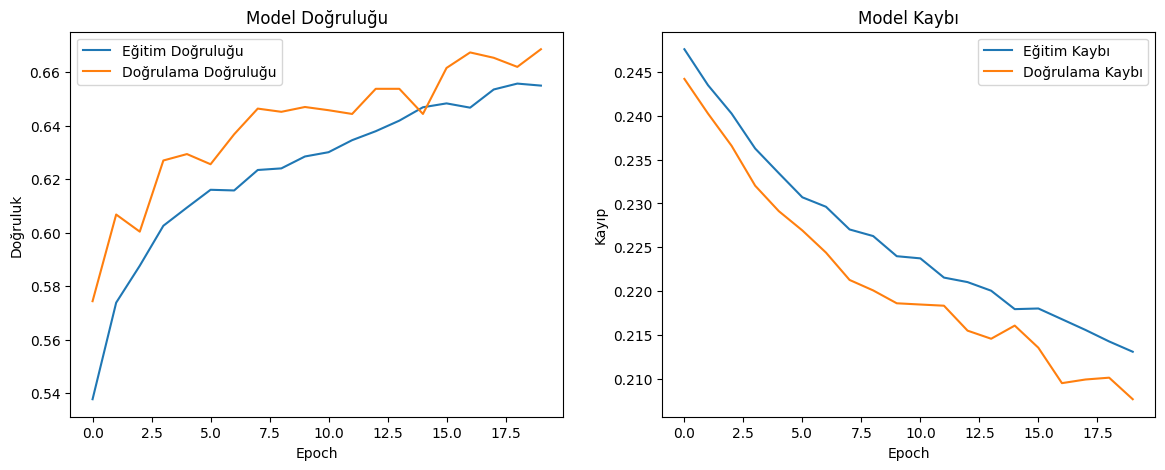

313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 179ms/step


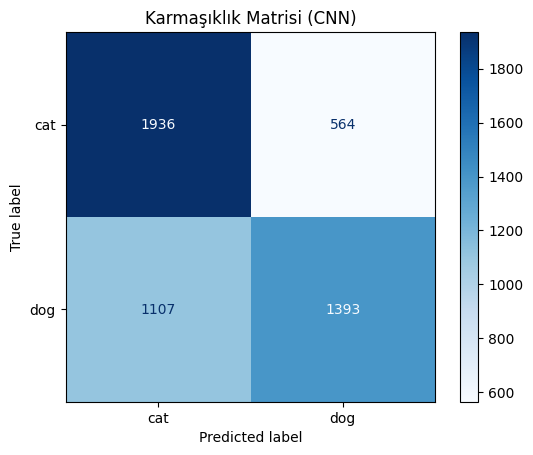

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os


print("GPU sayısı:", len(tf.config.list_physical_devices('GPU')))
print("GPU listesi:", tf.config.list_physical_devices('GPU'))
print("GPU aktif mi:", tf.config.list_physical_devices('GPU') != [])
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


train_path = "/kaggle/input/dog-cat222/dogs-vs-cats2/train"


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


cnn_model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')   
])

cnn_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001),
    loss='mse', 
    metrics=['accuracy']
)

cnn_model.summary()


history_cnn = cnn_model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    verbose=1
)


def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Eğitim Doğruluğu')
    plt.plot(epochs, val_acc, label='Doğrulama Doğruluğu')
    plt.title('Model Doğruluğu')
    plt.xlabel('Epoch')
    plt.ylabel('Doğruluk')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Eğitim Kaybı')
    plt.plot(epochs, val_loss, label='Doğrulama Kaybı')
    plt.title('Model Kaybı')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp')
    plt.legend()

    plt.show()

plot_history(history_cnn)


y_true = val_data.classes
y_pred_probs = cnn_model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(val_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Karmaşıklık Matrisi (CNN)")
plt.show()


**Performans değerlendirme:**

-Eğitim ve doğrulama doğruluğu ve kaybı grafikleri çizilmiştir.

-Doğrulama verisi üzerinde confusion matrix (karmaşıklık matrisi) hesaplanmış ve görselleştirilmiştir.

-Bu grafiklerin ve matrisin amacı modelin doğru sınıflandırma yapma başarısını eğitim ve doğrulama seti üzerinde izlemektir.

**Sonuç:**

-20. epoch sonunda model doğrulama grafiğinde eğitim ve doğrulama doğruluğu 20 epoch boyunca istikrarlı bir şekilde artarak 0.64-0.66 aralığında bir sonuç elde edilmiştir.
-20. epoch sonunda model kaybı grafiğinde eğitim ve doğrulama doğruluğu 20 epoch boyunca istikrarlı bir şekilde azalarak 0.215-0.210 aralığında bir sonuç elde edilmiştir.
-Karmaşıklık matris sonuçlarına bakılarak modelin tahmin sonuçlarında transfer learning oranlarına göre daha yüksek hatalar tespit edilmiştir 

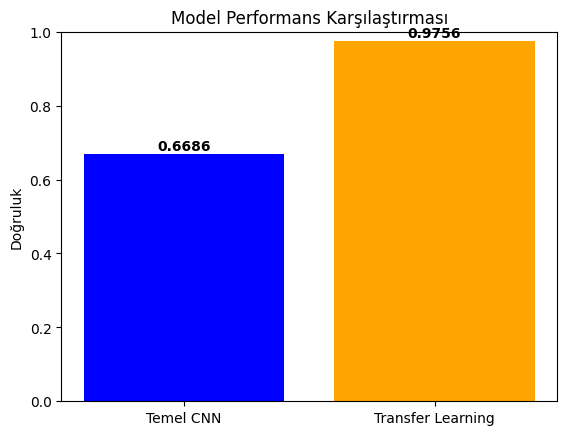

In [19]:
cnn_acc = history_cnn.history['val_accuracy'][-1]
transfer_acc = history_transfer.history['val_accuracy'][-1]


models = ['Temel CNN', 'Transfer Learning']
accuracies = [cnn_acc, transfer_acc]
colors = ['blue', 'orange']

plt.bar(models, accuracies, color=colors)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')

plt.ylim(0, 1)
plt.ylabel("Doğruluk")
plt.title("Model Performans Karşılaştırması")
plt.show()


**Kodun Amacı:**

-Bu kod, temel CNN ile transfer learning modelini doğrulama doğruluğu açısından karşılaştırmak için kullanılmıştır.

-Her iki modelin son epoch doğrulukları alınmış ve bar grafiği ile görselleştirilmiştir.

**Gözlem ve Yorum:**

-Grafikten görüldüğü gibi transfer learning modeli, kendi tasarladığımız CNN’e göre daha yüksek doğruluk sağlamıştır.

-Bunun nedeni, transfer learning modelinin önceden büyük bir veri seti üzerinde eğitilmiş MobileNetV2 yapısını kullanmasıdır.

-Böylece, sınırlı veri ile bile daha iyi özellik çıkarımı yaparak hızlı ve etkili öğrenir.

-Temel CNN modeli ise sıfırdan öğrenir ve küçük veri setlerinde genellikle daha düşük performans gösterdiği düşünülmüştür.